In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import miniscope_utils as ms
%matplotlib inline
import datetime


In [10]:
N_lenslets = 50
x_list = np.random.rand(N_lenslets)*2-1

y_list = np.random.rand(N_lenslets)*2-1
r_list = np.random.rand(N_lenslets)*4+16
lsurf, r, px, py = ms.make_lenslet_surface(x_list, y_list, r_list, (-2,2),(-1,1),(256,512), .9)

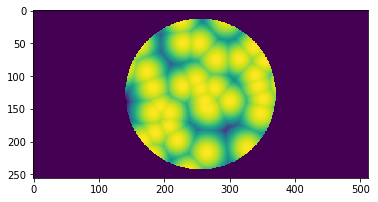

In [11]:
plt.figure()
plt.imshow(lsurf*r)

In [12]:
fname = 'foo'
def write_zemax_freeform(sag, pixel_size_x, pixel_size_y, filename, Fx=0, Fy=0, Fxy=0):
    nrows, ncols = sag.shape
    if (Fx == 0 or Fy == 0 or Fxy == 0):
        Fx = np.zeros_like(sag).ravel()
        Fy = np.zeros_like(sag).ravel()
        Fxy = np.zeros_like(sag).ravel()
    sag = sag.ravel()
    tm = datetime.datetime.now()
    dt_string = tm.strftime('%Y-%d-%b_%H%M%S')
    filename = filename+'_'+dt_string+'.dat'
    #USE MILIMETERS because zemax
    fid = open(filename,'w')
    #fid.write('%i' %ncols + '\t' + '%i' %nrows)#%.4e%.4e%i%.4f%.4f' + % ncols + %nrows + %pixel_size + %pixel_size + %0 +%0 + %0)
    fid.write('%i\t%i\t%.4e\t%.4e\t%i\t%.4f\t%.4f' %(ncols,nrows,pixel_size_x,pixel_size_y,0.,0.,0.))
    for m in range(len(sag)):
        fid.write('%.8f\t%.8f\t%.8f\t%.8f\n' %(sag[m],Fx[m],Fy[m],Fxy[m]));
    fid.close()


In [13]:
write_zemax_freeform(lsurf,px, py, 'foo', )